<h1>Data Visualization</h1>

Data visualization to explore datasets and uncover patterns in data.

In [86]:
import glob
import numpy as np
import pandas as pd

<h2>The Dataset</h2>
Financial times one month per year blabla.


In [87]:
path ='data' #use your path
allFiles = glob.glob(path + "/*.json")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    frame = pd.read_json(file_)
    list_.append(frame)
df = pd.concat(list_)

In [88]:
df['paper_dc_date'] = pd.to_datetime(df['paper_dc_date'])
df = df.set_index(['paper_dc_date'], drop=False)

In [89]:
df.head(10)

,_id,article_dc_subject,article_dc_title,paper_dc_date,paper_dc_title,paper_dcterms_spatial,paper_dcterms_temporal,text_content
paper_dc_date,,,,,,,,
1939-09-01,FTDA_1939_0901_0001_001,article,Fuller Horsey Sons & Cassell,1939-09-01,The Financial Times,National Daily,National Daily,-ESTABLISHED 1807- FULLER HORSEY . SONS & CASS...
1939-09-01,FTDA_1939_0901_0001_002,article,Index and News Summary,1939-09-01,The Financial Times,National Daily,National Daily,ELL V MÂ·1 f.Z Pag American Markets Answers to...
1939-09-01,FTDA_1939_0901_0001_003,article,Gold Again Dearer,1939-09-01,The Financial Times,National Daily,National Daily,"Bank Rate 4 per cent., 24th August, 1939 Depos..."
1939-09-01,FTDA_1939_0901_0001_004,article,The Financial Times,1939-09-01,The Financial Times,National Daily,National Daily,CITY EDITION LARGEST CIRCULATION OF ANY FINANC...
1939-09-01,FTDA_1939_0901_0001_005,article,Rise in British Funds Severely Checked,1939-09-01,The Financial Times,National Daily,National Daily,Setember . October Contango...... M6n. 4 18 Mo...
1939-09-01,FTDA_1939_0901_0001_006,article,Gilt-Edged Fluctuate,1939-09-01,The Financial Times,National Daily,National Daily,Gilt-edged securities opened at prices moderat...
1939-09-01,FTDA_1939_0901_0001_007,article,China Coupon Due To-Day,1939-09-01,The Financial Times,National Daily,National Daily,All considerations of business were overridden...
1939-09-01,FTDA_1939_0901_0001_008,article,Quotations Lowered as Precaution,1939-09-01,The Financial Times,National Daily,National Daily,THURSDAY Evening. The Industrial market was in...
1939-09-01,FTDA_1939_0901_0001_009,article,"Blades, East & Blades, Limited",1939-09-01,The Financial Times,National Daily,National Daily,COMPANY PRINTING All Specimen Forms and inform...


In [90]:
def word_counter(row):
    tokens = row["text_content"].split(" ")
    return len(tokens)

In [92]:
#calculate length of articles
df['article_length'] = df['text_content'].str.len()

#calculate number of words
df["number_of_words"] = df.apply(word_counter, axis=1)

#calculate mean length per day
df['mean_article_length'] = df['article_length'].groupby(pd.TimeGrouper('D')).aggregate(np.mean).dropna()
df['mean_number_of_words'] = df['number_of_words'].groupby(pd.TimeGrouper('D')).aggregate(np.mean).dropna()

In [93]:
df

,_id,article_dc_subject,article_dc_title,paper_dc_date,paper_dc_title,paper_dcterms_spatial,paper_dcterms_temporal,text_content,article_length,number_of_words,mean_size,mean_article_length,mean_number_of_words
paper_dc_date,,,,,,,,,,,,,
1939-09-01,FTDA_1939_0901_0001_001,article,Fuller Horsey Sons & Cassell,1939-09-01,The Financial Times,National Daily,National Daily,-ESTABLISHED 1807- FULLER HORSEY . SONS & CASS...,180,29,3656.55000,3656.55000,611.200000
1939-09-01,FTDA_1939_0901_0001_002,article,Index and News Summary,1939-09-01,The Financial Times,National Daily,National Daily,ELL V MÂ·1 f.Z Pag American Markets Answers to...,4237,684,3656.55000,3656.55000,611.200000
1939-09-01,FTDA_1939_0901_0001_003,article,Gold Again Dearer,1939-09-01,The Financial Times,National Daily,National Daily,"Bank Rate 4 per cent., 24th August, 1939 Depos...",3227,534,3656.55000,3656.55000,611.200000
1939-09-01,FTDA_1939_0901_0001_004,article,The Financial Times,1939-09-01,The Financial Times,National Daily,National Daily,CITY EDITION LARGEST CIRCULATION OF ANY FINANC...,133,20,3656.55000,3656.55000,611.200000
1939-09-01,FTDA_1939_0901_0001_005,article,Rise in British Funds Severely Checked,1939-09-01,The Financial Times,National Daily,National Daily,Setember . October Contango...... M6n. 4 18 Mo...,1055,168,3656.55000,3656.55000,611.200000
1939-09-01,FTDA_1939_0901_0001_006,article,Gilt-Edged Fluctuate,1939-09-01,The Financial Times,National Daily,National Daily,Gilt-edged securities opened at prices moderat...,4365,726,3656.55000,3656.55000,611.200000
1939-09-01,FTDA_1939_0901_0001_007,article,China Coupon Due To-Day,1939-09-01,The Financial Times,National Daily,National Daily,All considerations of business were overridden...,4520,782,3656.55000,3656.55000,611.200000
1939-09-01,FTDA_1939_0901_0001_008,article,Quotations Lowered as Precaution,1939-09-01,The Financial Times,National Daily,National Daily,THURSDAY Evening. The Industrial market was in...,10127,1790,3656.55000,3656.55000,611.200000
1939-09-01,FTDA_1939_0901_0001_009,article,"Blades, East & Blades, Limited",1939-09-01,The Financial Times,National Daily,National Daily,COMPANY PRINTING All Specimen Forms and inform...,331,51,3656.55000,3656.55000,611.200000


In [76]:
len(df['text_content'])

14154

In [7]:
df

,_id,article_dc_subject,article_dc_title,paper_dc_date,paper_dc_title,paper_dcterms_spatial,paper_dcterms_temporal,text_content,article_length,mean_size
paper_dc_date,,,,,,,,,,
1939-09-01,FTDA_1939_0901_0001_001,article,Fuller Horsey Sons & Cassell,1939-09-01,The Financial Times,National Daily,National Daily,-ESTABLISHED 1807- FULLER HORSEY . SONS & CASS...,180,3656.55000
1939-09-01,FTDA_1939_0901_0001_002,article,Index and News Summary,1939-09-01,The Financial Times,National Daily,National Daily,ELL V MÂ·1 f.Z Pag American Markets Answers to...,4237,3656.55000
1939-09-01,FTDA_1939_0901_0001_003,article,Gold Again Dearer,1939-09-01,The Financial Times,National Daily,National Daily,"Bank Rate 4 per cent., 24th August, 1939 Depos...",3227,3656.55000
1939-09-01,FTDA_1939_0901_0001_004,article,The Financial Times,1939-09-01,The Financial Times,National Daily,National Daily,CITY EDITION LARGEST CIRCULATION OF ANY FINANC...,133,3656.55000
1939-09-01,FTDA_1939_0901_0001_005,article,Rise in British Funds Severely Checked,1939-09-01,The Financial Times,National Daily,National Daily,Setember . October Contango...... M6n. 4 18 Mo...,1055,3656.55000
1939-09-01,FTDA_1939_0901_0001_006,article,Gilt-Edged Fluctuate,1939-09-01,The Financial Times,National Daily,National Daily,Gilt-edged securities opened at prices moderat...,4365,3656.55000
1939-09-01,FTDA_1939_0901_0001_007,article,China Coupon Due To-Day,1939-09-01,The Financial Times,National Daily,National Daily,All considerations of business were overridden...,4520,3656.55000
1939-09-01,FTDA_1939_0901_0001_008,article,Quotations Lowered as Precaution,1939-09-01,The Financial Times,National Daily,National Daily,THURSDAY Evening. The Industrial market was in...,10127,3656.55000
1939-09-01,FTDA_1939_0901_0001_009,article,"Blades, East & Blades, Limited",1939-09-01,The Financial Times,National Daily,National Daily,COMPANY PRINTING All Specimen Forms and inform...,331,3656.55000


<h3>Line charts</h3>

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

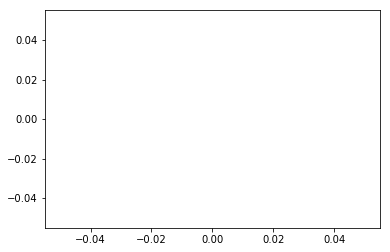

In [9]:
plt.plot()
plt.show()

plt.plot(x_values, y_values)<br>
Matplotlib will accept any iterable object, like NumPy arrays and pandas.Series instances.

<h4>Assignment 1</h4>
Generate a line graph of the mean length of articles in 1991 that shows the date on the x-axis and the length of the articles on the y-axis

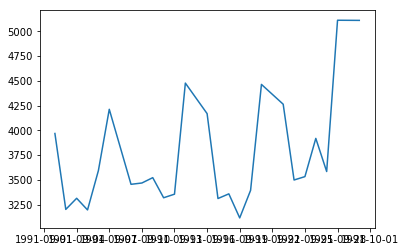

In [10]:
plt.plot(df['1991'].index, df['1991']['mean_size'])
plt.show()

The x-axis is not very readable. We need to turn the labels. We can do this with the xticks function. 

matplotlib.pyplot.xticks(*args, **kwargs)

Documentation for this function: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks

<h4>Assignment 2</h4>
Generate a line graph that shows the date on the x-axis and the mean length of the articles on the y-axis.<br>
But also rotate the x-axis with 90 degrees.

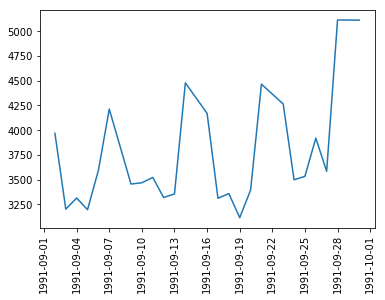

In [11]:
plt.plot(df['1991'].index, df['1991']['mean_size'])
plt.xticks(rotation=90)
plt.show()

We still need to add labels to the x-axis and the y-axis, and we need to give a title to the graph. <br>
To set the x-axis label we can pass a string to the function: xlabel()
For the y-axis label, pass a string value to: ylabel()
To give the graph a title pass a string value to: title()


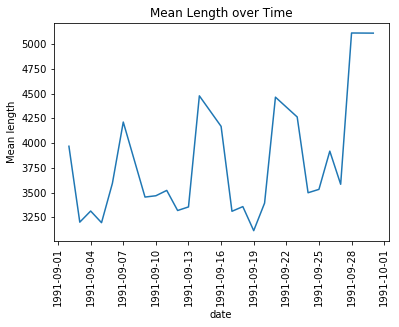

In [12]:
plt.plot(df['1991'].index, df['1991']['mean_size'])
plt.xticks(rotation=90)
plt.xlabel("date")
plt.ylabel("Mean length")
plt.title("Mean Length over Time")
plt.show()

<h3>The Elements of the Graph</h3>

Figure object -- top-levelcontainer 
```
fig = plt.figure()
```
Axes object -- information to plot the figure on a grid

Axes object contains the values, ticks on the x-axis and y-axis and visual symbols such as markers, lines, and gridlines

A figure can contain multiple plots.

axes_obj = fig.add_subplot(nrows, ncols, plot_number)
```
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
```

<h3>Assignment 3</h3>
Create a figure that contains four plots with 2 rows and 2 columns

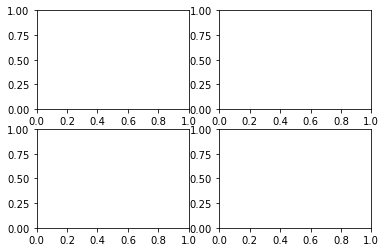

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
plt.show()


The graphs are a little close. 
To increase the padding between them you can add
```
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

```

Try and add it to the previous block

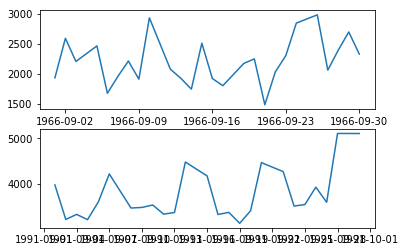

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(df['1966'].index, df['1966']['mean_size'])
ax2.plot(df['1991'].index, df['1991']['mean_size'])

plt.show()

```
fig = plt.figure(figsize=(width, height))
```

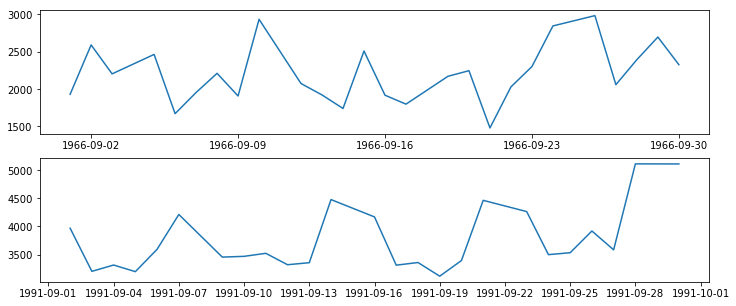

In [15]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(df['1966'].index, df['1966']['mean_size'])
ax2.plot(df['1991'].index, df['1991']['mean_size'])

plt.show()

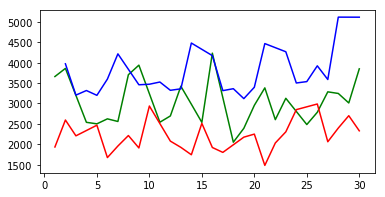

In [16]:
#to be able to compare the months on a variable. Made a list with the day. 
df['day'] = df['paper_dc_date'].dt.day
df['week'] = df['paper_dc_date'].dt.week
df['year'] = df['paper_dc_date'].dt.year
fig = plt.figure(figsize=(6,3))

plt.plot(df['1939']['day'], df['1939']['mean_size'], c='green')
plt.plot(df['1966']['day'], df['1966']['mean_size'], c='red')
plt.plot(df['1991']['day'], df['1991']['mean_size'], c='blue')
plt.show()

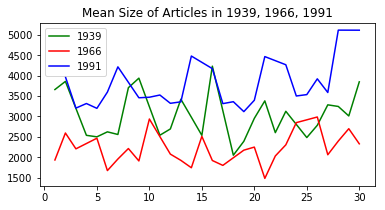

In [17]:
#to be able to compare the months on a variable. Made a list with the day. 
df['day'] = df['paper_dc_date'].dt.day
fig = plt.figure(figsize=(6,3))
plt.title("Mean Size of Articles in 1939, 1966, 1991")

plt.plot(df['1939']['day'], df['1939']['mean_size'], c='green', label='1939')
plt.plot(df['1966']['day'], df['1966']['mean_size'], c='red', label='1966')
plt.plot(df['1991']['day'], df['1991']['mean_size'], c='blue', label='1991')
plt.legend(loc='upper left')
plt.show()
#I could do the assignment of colors and labels with a for loop, but this is clearer I think


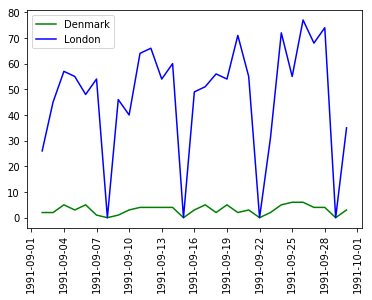

In [18]:
plt.plot(df['1991']['text_content'][df['1991']['text_content'].str.contains("Denmark", regex=True)].groupby(pd.TimeGrouper('D')).count(), c='green',label='Denmark')
plt.plot(df['1991']['text_content'][df['1991']['text_content'].str.contains("London", regex=True)].groupby(pd.TimeGrouper('D')).count(), c='blue',label='London')
plt.legend(loc='upper left')
plt.xticks(rotation='90')
plt.show()

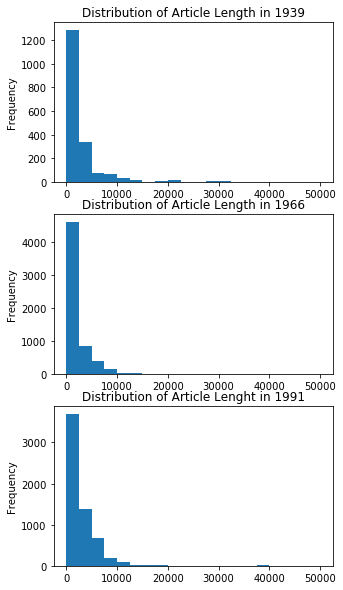

In [45]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.hist(df['1939']['article_length'], 20, range=(0,50000))
ax1.set_title("Distribution of Article Length in 1939")
#ax1.set_ylim(0,50)
ax1.set_ylabel("Frequency")

ax2.hist(df['1966']['article_length'], 20, range=(0,50000))
ax2.set_title("Distribution of Article Length in 1966")
#ax2.set_ylim(0,50)
ax2.set_ylabel("Frequency")

ax3.hist(df['1991']['article_length'], 20, range=(0,50000))
ax3.set_title("Distribution of Article Lenght in 1991")
#ax3.set_ylim(0,50)
ax3.set_ylabel("Frequency")

plt.show()

<h3>Boxplot</h3>
Contains one forth of the values. Median is middle line. 
The whiskers in relation to the box shows us how spread out the set is. 


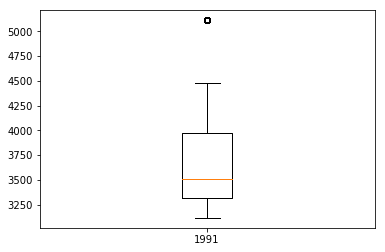

In [49]:
fig,ax = plt.subplots()
ax.boxplot(df['1991']['mean_size'])
#ax.set_ylim(0,5000)
ax.set_xticklabels(["1991"])

plt.show()

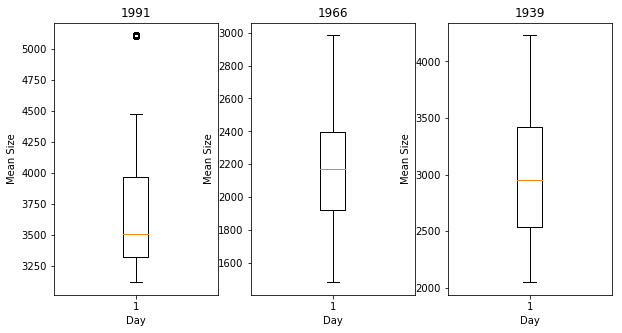

In [62]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.boxplot(df['1991']['mean_size'])
ax1.set_title('1991')
ax1.set_xlabel('Day')
ax1.set_ylabel('Mean Size')
ax2.boxplot(df['1966']['mean_size'])
ax2.set_title('1966')
ax2.set_xlabel('Day')
ax2.set_ylabel('Mean Size')
ax3.boxplot(df['1939']['mean_size'])
ax3.set_title('1939')
ax3.set_xlabel('Day')
ax3.set_ylabel('Mean Size')
plt.show()

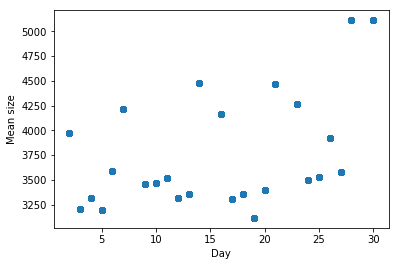

In [50]:
fig, ax = plt.subplots()
ax.scatter(df['1991']['day'], df['1991']['mean_size'])
ax.set_xlabel('Day')
ax.set_ylabel('Mean size')
plt.show()

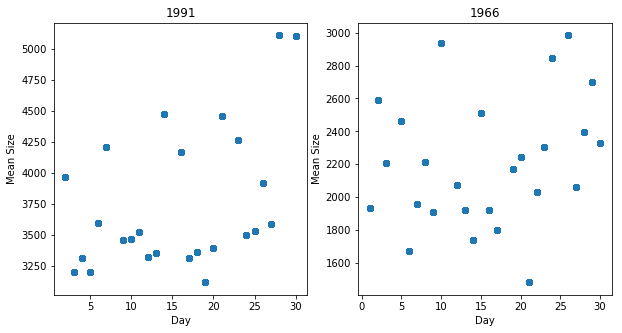

In [20]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(df['1991']['day'], df['1991']['mean_size'])
ax1.set_title('1991')
ax1.set_xlabel('Day')
ax1.set_ylabel('Mean Size')
ax2.scatter(df['1966']['day'], df['1966']['mean_size'])
ax2.set_title('1966')
ax2.set_xlabel('Day')
ax2.set_ylabel('Mean Size')
plt.show()

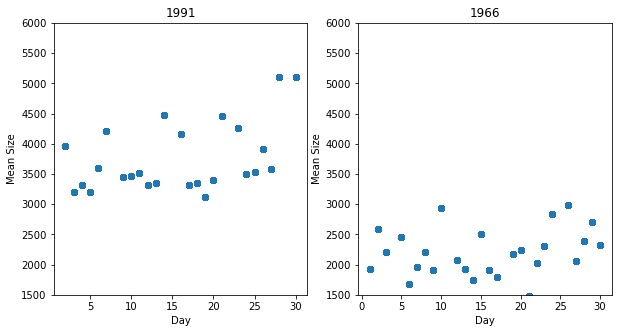

In [21]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(df['1991']['day'], df['1991']['mean_size'])
ax1.set_title('1991')
ax1.set_xlabel('Day')
ax1.set_ylabel('Mean Size')
ax1.set_ylim(1500,6000)
ax2.scatter(df['1966']['day'], df['1966']['mean_size'])
ax2.set_title('1966')
ax2.set_xlabel('Day')
ax2.set_ylabel('Mean Size')
ax2.set_ylim(1500,6000)
plt.show()

Frequency distribution
How many articles per day



In [64]:
frequency_counts = df['paper_dc_date'].value_counts().sort_index()

In [68]:
total_1939 = df['1939']['text_content'].count()
total_1966 = df['1966']['text_content'].count()
total_1991 = df['1991']['text_content'].count()


AttributeError: 'Series' object has no attribute 'values_counts'

1874

<H2>Plotting with Pandas</h2>
Plotting with Pandas relies on Matplotlib. It's done via the function
```
dataframe.plot()
```
We can pass the x and y-value, the kind of plot, the title and the figsize in one line. 
For instance: 
```
df['1991'].plot(x='day', y='mean_size', kind='scatter', title='Mean size per day', figsize=(5,10))
```
More on this see: http://pandas.pydata.org/pandas-docs/version/0.19.0/generated/pandas.DataFrame.plot.html

Try to plot a green line graph for 1966 with the 'day' as the x-axis, mean-size as the y-axis and give the line the label '1966'


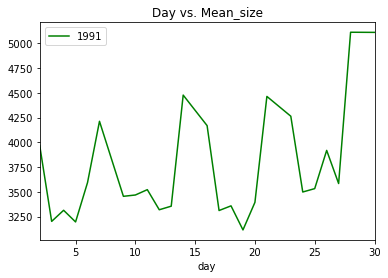

In [24]:
df['1991'].plot(x='day', y='mean_size', kind='line', title='Day vs. Mean_size', label="1991", color='green')

If you output the pandas plot to a variable, you can override this graph using the matplotlib functions you learned. 
Try to change the limit of the y-axis, and the title of the graph.  

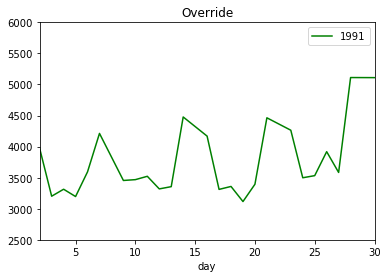

In [25]:
ax = df['1991'].plot(x='day', y='mean_size', kind='line', title='Day vs. Mean_size', label="1991", color='green')
ax.set_ylim(2500,6000)
ax.set_title("Override")


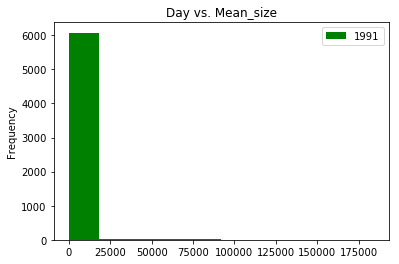

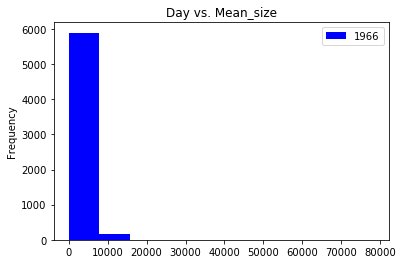

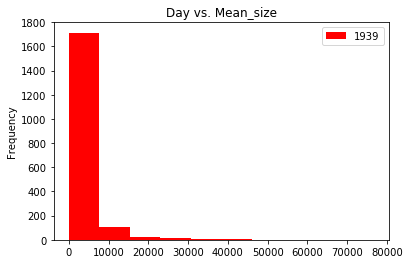

In [34]:
df['1991'].plot(x='day', y='article_length', kind='hist', title='Day vs. Mean_size', label="1991", color='green')
df['1966'].plot(x='day', y='article_length', kind='hist', title='Day vs. Mean_size', label="1966", color='blue')
df['1939'].plot(x='day', y='article_length', kind='hist', title='Day vs. Mean_size', label="1939", color='red')

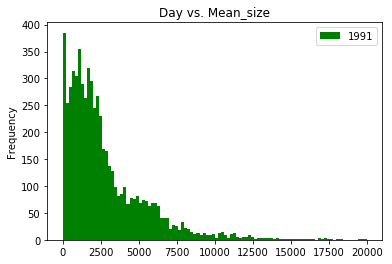

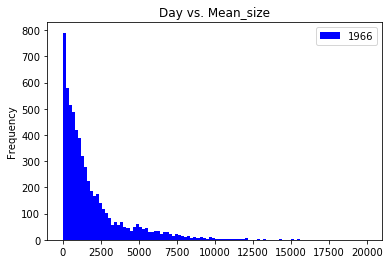

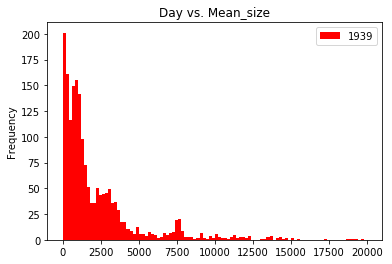

In [33]:
df['1991'].plot(x='day', y='article_length', kind='hist', title='Day vs. Mean_size', label="1991", color='green', bins=100, range=(0,20000))
df['1966'].plot(x='day', y='article_length', kind='hist', title='Day vs. Mean_size', label="1966", color='blue', bins=100, range=(0,20000))
df['1939'].plot(x='day', y='article_length', kind='hist', title='Day vs. Mean_size', label="1939", color='red', bins=100, range=(0,20000))
#standard determination of number of bins, you can override this by adding bins=x

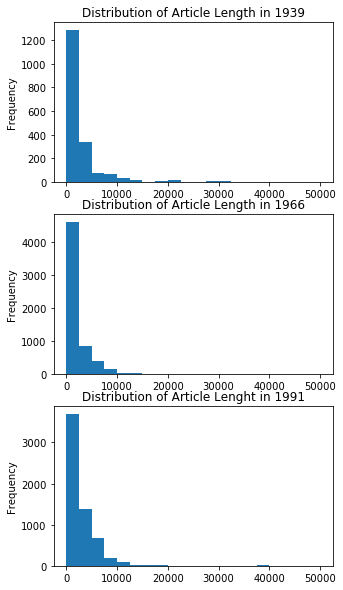

<h3>Further reading/exploration</h3>
Edward Tufte's book 'The visual display of quantitative information'
Also see Bokeh and Seaborn for many more plotting options. 
<ul>
<li>https://seaborn.pydata.org</li>
<li>http://bokeh.pydata.org/en/latest/</li>
</ul>